[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


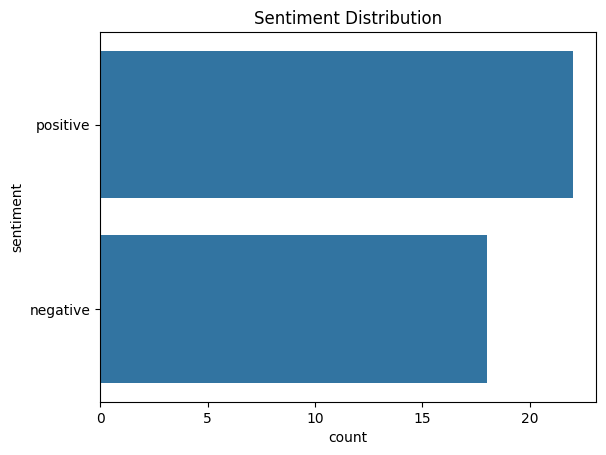

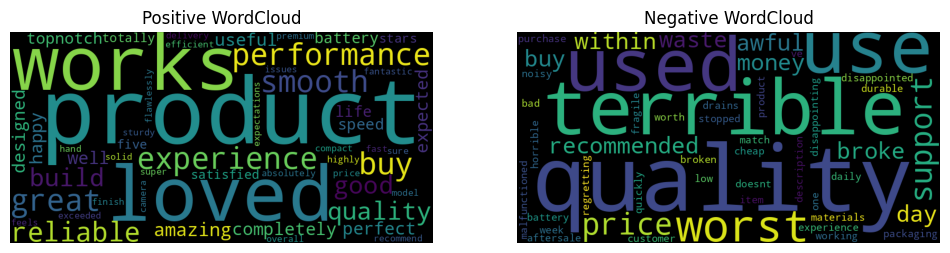

Naive Bayes Classification Report:

              precision    recall  f1-score   support

    negative       1.00      0.33      0.50         6
    positive       0.60      1.00      0.75         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12



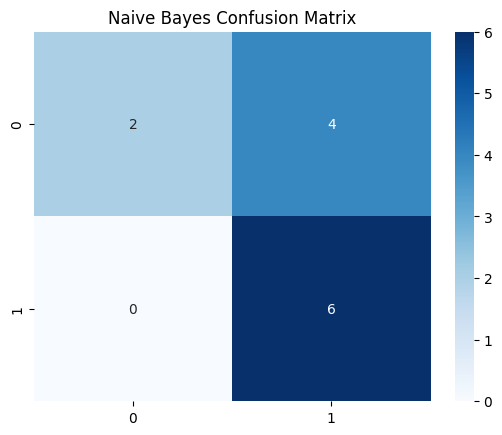

Logistic Regression Classification Report:

              precision    recall  f1-score   support

    negative       1.00      0.17      0.29         6
    positive       0.55      1.00      0.71         6

    accuracy                           0.58        12
   macro avg       0.77      0.58      0.50        12
weighted avg       0.77      0.58      0.50        12



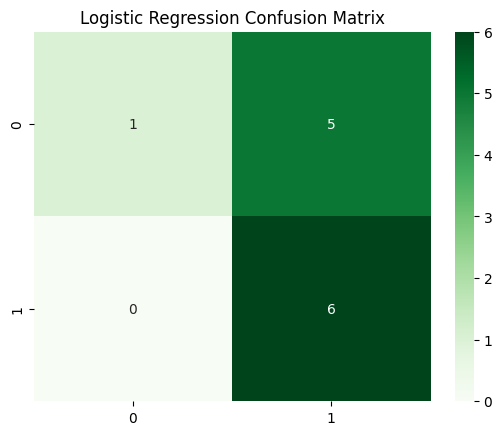

Sample Predictions:

'I love this product, it’s amazing and works great!' → Positive
'Worst experience ever, totally waste of money.' → Positive
'It’s decent, not too good not too bad.' → Positive


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
import re
import string
from wordcloud import WordCloud
nltk.download('stopwords')
from nltk.corpus import stopwords

# Step 2: Load the Dataset
data = pd.read_csv("final_sample_reviews.csv")
data.head()

# Step 3: Clean the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = text.strip()
    text = " ".join([word for word in text.split() if word not in stopwords.words('english')])
    return text

data['clean_text'] = data['Text'].apply(clean_text)
data['sentiment'] = data['Score'].apply(lambda x: 'positive' if x >= 4 else 'negative')

# Step 4: EDA - Sentiment Distribution
sns.countplot(data['sentiment'])
plt.title("Sentiment Distribution")
plt.show()

# Step 5: WordClouds
positive_text = " ".join(data[data['sentiment'] == 'positive']['clean_text'])
negative_text = " ".join(data[data['sentiment'] == 'negative']['clean_text'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=800, height=400).generate(positive_text))
plt.title("Positive WordCloud")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=800, height=400).generate(negative_text))
plt.title("Negative WordCloud")
plt.axis("off")
plt.show()

# Step 6: TF-IDF Vectorization
X = data['clean_text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfidf = TfidfVectorizer()
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Step 7: Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
y_pred_nb = nb_model.predict(X_test_vec)

print("Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap="Blues")
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# Step 8: Logistic Regression Comparison
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap="Greens")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Step 9: Sample Predictions
sample_reviews = [
    "I love this product, it’s amazing and works great!",
    "Worst experience ever, totally waste of money.",
    "It’s decent, not too good not too bad."
]

sample_cleaned = [clean_text(r) for r in sample_reviews]
sample_vec = tfidf.transform(sample_cleaned)

print("Sample Predictions:\n")
for review, prediction in zip(sample_reviews, nb_model.predict(sample_vec)):
    print(f"'{review}' → {prediction.capitalize()}")
